<center>
    
# Algorithmes de tri et invariant de boucle
    
## Corrigé
</center>

## A -  Invariant de boucle

__Exemple 1__

In [1]:
def division_euclidienne(a : int, b : int)-> tuple:
    """
    Retourne un tuple (q, r) tels que q est le quotient
    et r le reste de la division euclidienne de a par b
    """
    q = 0
    r = a
    while r >= b:
        # invariant : 0 <= r
        assert 0 <= r
        # invariant : a = q*b + r
        assert a == q*b+r
        q = q + 1
        r = r - b
    return q, r

In [2]:
# Voir la documentation
help(division_euclidienne)

Help on function division_euclidienne in module __main__:

division_euclidienne(a: int, b: int) -> tuple
    Retourne un tuple (q, r) tels que q est le quotient
    et r le reste de la division euclidienne de a par b



In [3]:
# Quelques test :
print(division_euclidienne(13, 5))
print(division_euclidienne(0, 5))
print(division_euclidienne(12354, 123))
print(division_euclidienne(13, 15))
print(division_euclidienne(160, 4))

(2, 3)
(0, 0)
(100, 54)
(0, 13)
(40, 0)


__Exemple 2__

In [4]:
def somme_premiers_entiers(n : int)-> int:
    """
    Retourne la somme des n premiers entiers
    non nuls.
    """
    s = 1
    for i in range(n-1):
        # invariant : s = 1 + 2 + ... + (i+1)
        s = s + (i + 2)
    return s

In [5]:
# Quelques test
print(somme_premiers_entiers(1))
print(somme_premiers_entiers(3))
print(somme_premiers_entiers(100))

1
6
5050


**_Exercice 1_**

In [6]:
def puissance(x, n):
    r = 1
    for i in range(n):
        r = r * x
    return r

**_1._** Un invariant de boucle est : `r = x**i` :
- au début de la boucle (avant d'effectuer les instructions de la boucle), on a `i = 0` et `r = 1`. On a bien `r = x**0 = 1`.
- à chaque itération de la boucle, on a au début `r = x**i` et à la fin `r = (x**i)*x=x**(i+1)`, l'invariant est préservé.
- à la dernière itération `i = n - 1`, ainsi en sortant de la boucle on aura : `r = (x**i)*x=x**(n-1)*x= x**n`.

In [7]:
def puissance(x : float, n : int)-> float:
    """
    Retourne le résultat de x à la puissance n
    où x est un nombre réel et n un entier positf ou nul
    """
    r = 1
    for i in range(n):
        # invariant : r = x**i
        r = r * x
    return r

In [8]:
assert puissance(0, 10) == 0
assert puissance(1, 55) == 1
assert puissance(2, 10) == 1024
assert puissance(7, 0) == 1
assert puissance(-1, 7) == -1

**_Exercice 2_**

In [9]:
def f(t):
    s = 0
    for i in range(len(t)):
        s = s + t[i]
    return s

Cette fonction semble calculer la somme des valeurs contenues dans le tableau `t` et 0 si le tableau est vide. 

Un invariant de boucle serait : `s = t[0] + t[1] + ... + t[i-1]` si `i>=1` et `s = 0` sinon.
- au début de la boucle : `i = 0` et `s = 0`, l'invariant est vérifié.
- à chaque itération on a `s = s + t[i]=t[0]+t[1]+...+t[i-1]+t[i]=t[0]+t[1]+...+t[(i-1)+1]`, l'invariant est conservé.
- la dernière valeur de `i` est `len(t)-1` qui correspond à l'indice `n-1` du dernier terme du tableau, on aura alors :    
`s = s+t[n-1]=t[0]+t[1]+...+t[n-2]+t[n-1]` : ce qui correspond bien à la somme des éléments du tableau `t`.

In [51]:
def somme_valeurs_tableau(t : list)-> float:
    """
    Retourne la somme des valeurs du tableau t de taille n
    et 0 si le tableau est vide.
    Ces valeurs sont des entiers ou des nombres décimaux.
    """
    s = 0
    for i in range(len(t)):
        # invariant : s = t[0]+t[1]+...+t[i-1]
        s = s + t[i]
    return s

assert somme_valeurs_tableau([]) == 0
assert somme_valeurs_tableau([1, 2, 3]) == 6
assert somme_valeurs_tableau([-5.2, 10, -4.8]) == 0

## B - Tri par sélection
**_Exercice 3_**

In [9]:
def echange(t : list, i : int, j : int):
    """
    Echange deux éléments du tableau t situés aux indices i et j
    """
    temporaire = t[i]
    t[i] = t[j]
    t[j] = temporaire

# Un test
t = [1, 2, 3]
echange(t, 1, 0)
assert t == [2, 1, 3]

**_Exercice 4_**

In [7]:
def tri_par_selection(t : list):
    """
    Trie par ordre croissant le tableau t de taille n
    en utilisant le tri par sélection
    """
    n = len(t)
    for i in range(n):
        # t[0...i[ est trié
        # t[0..i[ < t[i..n-1]
        m = i
        for j in range(i+1, n):
            if t[j] < t[m]:
                m = j
        echange(t, i, m)

In [11]:
# Quelques tests
from random import randint
n = 10
t = [randint(1, n) for i in range(n)]
print(t)
tri_par_selection(t)
print(t)

n = 50
t = [randint(1, n) for i in range(n)]
print(t)
tri_par_selection(t)
print(t)

[6, 8, 1, 7, 8, 1, 1, 6, 2, 4]
[1, 1, 1, 2, 4, 6, 6, 7, 8, 8]
[10, 24, 10, 31, 48, 46, 21, 5, 47, 50, 45, 16, 43, 39, 6, 30, 10, 9, 26, 42, 45, 34, 30, 30, 15, 27, 10, 45, 5, 25, 26, 44, 12, 19, 3, 4, 4, 18, 30, 24, 39, 20, 18, 13, 48, 44, 9, 8, 19, 15]
[3, 4, 4, 5, 5, 6, 8, 9, 9, 10, 10, 10, 10, 12, 13, 15, 15, 16, 18, 18, 19, 19, 20, 21, 24, 24, 25, 26, 26, 27, 30, 30, 30, 30, 31, 34, 39, 39, 42, 43, 44, 44, 45, 45, 45, 46, 47, 48, 48, 50]


**Preuve de la correction :**
- au début on a `i = 0`, ainsi le tableau de gauche est vide donc trié. Le deuxième point est aussi vérifé.
- à chaque itération on échange `t[i]` et `t[m]` avec m dans `[i+1, n-1]` et `t[m] < t[i]`, ainsi les éléments `t[0...i]` seront encore triés puisque `t[i]` est plus grand que ceux à sa gauche et plus petit que ceux à sa droite : `t[0...i+1[<t[i+1...n-1]`.
- à la fin de boucle, on a `i=n-1`, ainsi on n'entre pas dans la deuxième boucle car `i+1=n`, ainsi le tableau `t[0...n-1]` est bien trié car `t[0...n-2]` l'est et `t[n-1]` est plus grand que la partie gauche du tableau.

## C - Tri par insertion
**_Exercice 5_**

In [4]:
def insere(t : list, i : int):
    """
    Insere la valeur v = t[i] dans la partie du tableau
    t[0..i] en supposant t[0..i-1] déjà trié
    """
    j = i-1
    v = t[i]
    while t[j] > v and j >= 0:
        t[j+1] = t[j]
        t[j] = v
        j = j - 1
    # On a soit v <= t[j] pour j < i ou j = -1
    # La partie droite du tableau est encore trié
    # car t[j] = v, d'où t[j] < t[j+1] ou v = t[0]

# Quelques tests
t = [2]
insere(t, 0)
assert t == [2]
t = [1,2,3,5,0,1]
insere(t, 4)
assert t == [0, 1, 2, 3, 5, 1]
insere(t, 5)
assert t == [0, 1, 1, 2, 3, 5]

In [13]:
def tri_par_insertion(t : list):
    """
    Trie par ordre croissant le tableau t de taille n
    en utilisant le tri par sélection
    """
    n = len(t)
    for i in range(n):
        # Invariant : la partie t[0..i] du tableau est triée
        insere(t, i)

# Quelques tests
n = 1000
t = [randint(1, n) for i in range(n)]
tri_par_selection(t)
assert t == sorted(t)

**Preuve de la correction :**
- au début de la boucle, on a `i = 0`, on peut considérer que `t[0]` est trié
- à chaque itération on insère l'élément d'indice `i` dans la partie `t[0..i-1]` déjà triée. À l'issue de cet insertion, la partie `t[0..i]` en triée
- à la dernière itération, on a `i = n-1`. Ainsi, on insère le dernier élément du tableau dans la partie déjà triée et à la fin de la boucle tout le tableau est trié

## D - Efficacité et notion informelle de complexité

**_Exercice 6_**

In [16]:
from random import shuffle

def tableau_melange(n : int)-> list:
    """
    Génère un tableau d'entiers de taille n
    """
    t = [i for i in range(n)]
    shuffle(t)
    return t

print(tableau_melange(10))
print(tableau_melange(50))

[6, 2, 9, 1, 4, 3, 5, 7, 8, 0]
[15, 48, 19, 20, 5, 26, 43, 7, 36, 17, 27, 45, 41, 18, 46, 40, 42, 22, 0, 24, 6, 21, 1, 23, 30, 38, 11, 28, 4, 10, 33, 2, 31, 25, 34, 39, 37, 44, 29, 14, 3, 13, 9, 12, 47, 32, 35, 8, 49, 16]


In [17]:
from time import time
def mesure_temps(f, n)-> float:
    t = tableau_melange(n)
    debut = time()
    f(t)
    fin = time()
    return fin - debut

In [18]:
tailles = [100, 500, 1000, 2000, 5000, 10000, 20000]
temps_tri1 = []
temps_tri2 = []
i = 0
for taille in tailles:
    temps_tri1.append(mesure_temps(tri_par_selection, taille))
    temps_tri2.append(mesure_temps(tri_par_insertion, taille))
    print(f"Taille : {taille}")
    print(f"Tri par selection : {temps_tri1[i]}, Tri par insertion : {temps_tri2[i]}")
    i = i + 1

Taille : 100
Tri par selection : 0.0004181861877441406, Tri par insertion : 0.0005292892456054688
Taille : 500
Tri par selection : 0.009838581085205078, Tri par insertion : 0.017740726470947266
Taille : 1000
Tri par selection : 0.03466296195983887, Tri par insertion : 0.03734755516052246
Taille : 2000
Tri par selection : 0.1313643455505371, Tri par insertion : 0.1608273983001709
Taille : 5000
Tri par selection : 0.8477630615234375, Tri par insertion : 0.9679203033447266
Taille : 10000
Tri par selection : 3.3702354431152344, Tri par insertion : 3.8735203742980957
Taille : 20000
Tri par selection : 13.466670274734497, Tri par insertion : 15.932206630706787


In [20]:
temps_tri1

[0.0004181861877441406,
 0.009838581085205078,
 0.03466296195983887,
 0.1313643455505371,
 0.8477630615234375,
 3.3702354431152344,
 13.466670274734497]

In [21]:
temps_tri2

[0.0005292892456054688,
 0.017740726470947266,
 0.03734755516052246,
 0.1608273983001709,
 0.9679203033447266,
 3.8735203742980957,
 15.932206630706787]

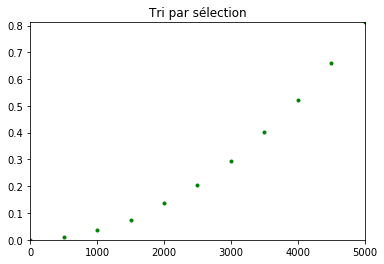

In [23]:
from matplotlib import pyplot

nombre_tests = 10
taille_max = 5000
x = [i*taille_max/nombre_tests for i in range(nombre_tests+1)]
y = [mesure_temps(tri_par_selection, int(i)) for i in x]
pyplot.plot(x, y, linestyle = 'none', marker = '.', color = 'green')
pyplot.xlim(0, taille_max)
pyplot.ylim(0, y[nombre_tests])
pyplot.title("Tri par sélection")
pyplot.show()

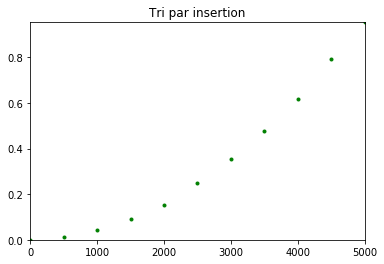

In [24]:
from matplotlib import pyplot

nombre_tests = 10
taille_max = 5000
x = [i*taille_max/nombre_tests for i in range(nombre_tests+1)]
y = [mesure_temps(tri_par_insertion, int(i)) for i in x]
pyplot.plot(x, y, linestyle = 'none', marker = '.', color = 'green')
pyplot.xlim(0, taille_max)
pyplot.ylim(0, y[nombre_tests])
pyplot.title("Tri par insertion")
pyplot.show()

**_Exercice 7_**

La boucle principale fait `n` appels à la fonction `insere`. Cette fonction dans le pire des cas (où le tableau est rangé par ordre décroissant au départ) réalise 1 déplacement de valeur dans le tableau, puis 2, ..., puis `n-1`, c'est-à-dire `(n-1)*n/2` opérations élémentaires.

Si le tableau est déjà trié, dans la fontion `insere`, on sort immédiatement de la boucle `while`, sans modification du tableau. Cet appel à `insere` se fait en temps constant, par conséquent, le tri par insertion se limite à `n` appels à la fonction `insere`, d'où un temps proportionnel à `n^2`.

Plus généralement, le tri par insertion se comport favorablement si le tableau est "presque trié", ce qui arrive plus souvent qu'on ne le pense avec des données réalistes.

## Les tris fournis par Python
La fonction `sorted` génère un nouveau tableau trié à partir de celui donné en entrée :

In [47]:
t = [5, 2, 1, 4]
s = sorted(t)
print(f"t : {t} et s : {s}")

t : [5, 2, 1, 4] et s : [1, 2, 4, 5]


La méthode `sort` des objets de type `list` réalise le tri en place du tableau : il ne fabrique pas de copie en sortie :

In [49]:
t = [5, 2, 1, 4]
t.sort()
print(f"t : {t}")

t : [1, 2, 4, 5]
